In [13]:
# install pandas and parquet
##pip install pandas
#pip install parquet
#pip install pyarrow

Opis kolona:

datum_dolaska - datum kada bi gost trebao stići u hotel
datum_kreiranja_rezervacije - datum kada je rezervacija kreirana
datum_odjave - datum kada je gost napustio hotel
datum_otkazivanja_rezervacije - datum kada je rezervacija otkazana
broj_odraslih_gostiju - broj odraslih koji će boraviti u rezerviranim sobama
broj_djece_gostiju - broj djece koji će boraviti u rezerviranim sobama
zemlja_gosta - zemlja iz koje gost dolazi. Kategorije su zapisane u ISO 3155–3:2013 formatu
kanal_prodaje_id - id kanala prodaje preko kojeg je rezervacija napravljena (primjeri: direktna rezervacija, agencija, online)
tip_sobe_id - id tipa sobe koju je gost rezervirao
cijena_nocenja - cijena jednog noćenja za pojedinu rezeraciju
status_rezervacije - status rezervacije (Check-Out, Canceled, No-Show)
rezervacija_id - id rezervacije
gost_id - id gosta

In [14]:
import pandas as pd
dataset_path = './data/lumen/export_df.parquet'


(119210, 14)


<function matplotlib.pyplot.show(close=None, block=None)>

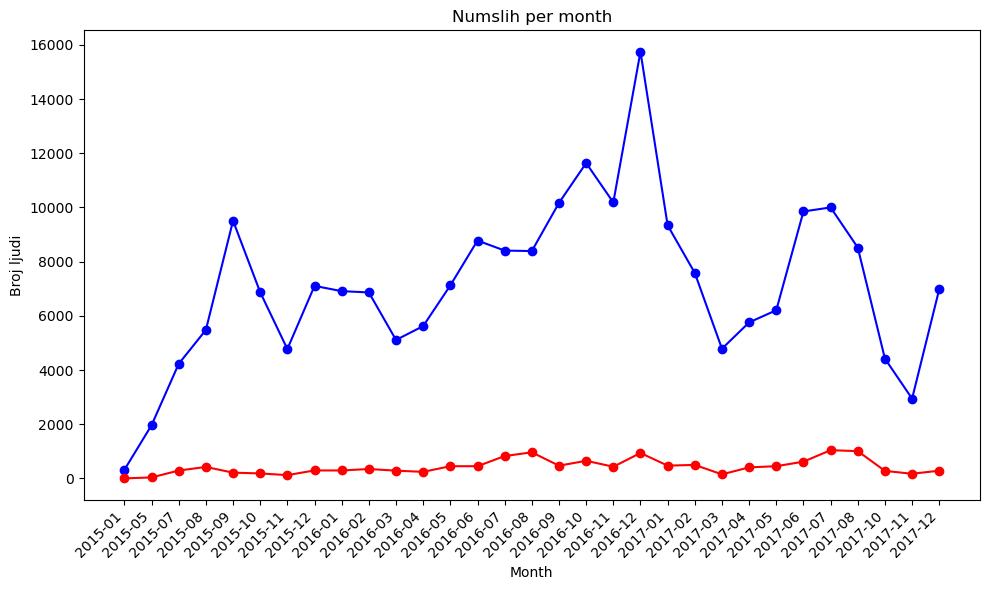

In [34]:
import matplotlib.pyplot as plt


df = pd.read_parquet(dataset_path)
print(df.shape)
df.head(10)

proba=pd.to_datetime(df['datum_dolaska'])
# print(proba)


monthly_data=df.groupby(proba.dt.to_period("M")).agg({'broj_odraslih_gostiju':'sum'}).reset_index()
# print(monthly_data)
monthly_data_djeca=df.groupby(proba.dt.to_period("M")).agg({'broj_djece_gostiju':'sum'}).reset_index()

# for index, row in monthly_data.iterrows():
#     print(f"{row['datum_dolaska'].strftime('%B %Y')}: {row['broj_odraslih_gostiju']}")


# for index, row in monthly_data_djeca.iterrows():
#     print(f"{row['datum_dolaska'].strftime('%B %Y')}: {row['broj_djece_gostiju']}")


plt.figure(figsize=(10,6))

plt.plot(monthly_data['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data['broj_odraslih_gostiju'].values, marker='o', linestyle='-', color='b')
plt.plot(monthly_data_djeca['datum_dolaska'].dt.strftime('%Y-%m').values, monthly_data_djeca['broj_djece_gostiju'].values, marker='o', linestyle='-', color='r')

plt.title('Numslih per month')
plt.xlabel('Month')
plt.ylabel('Broj ljudi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

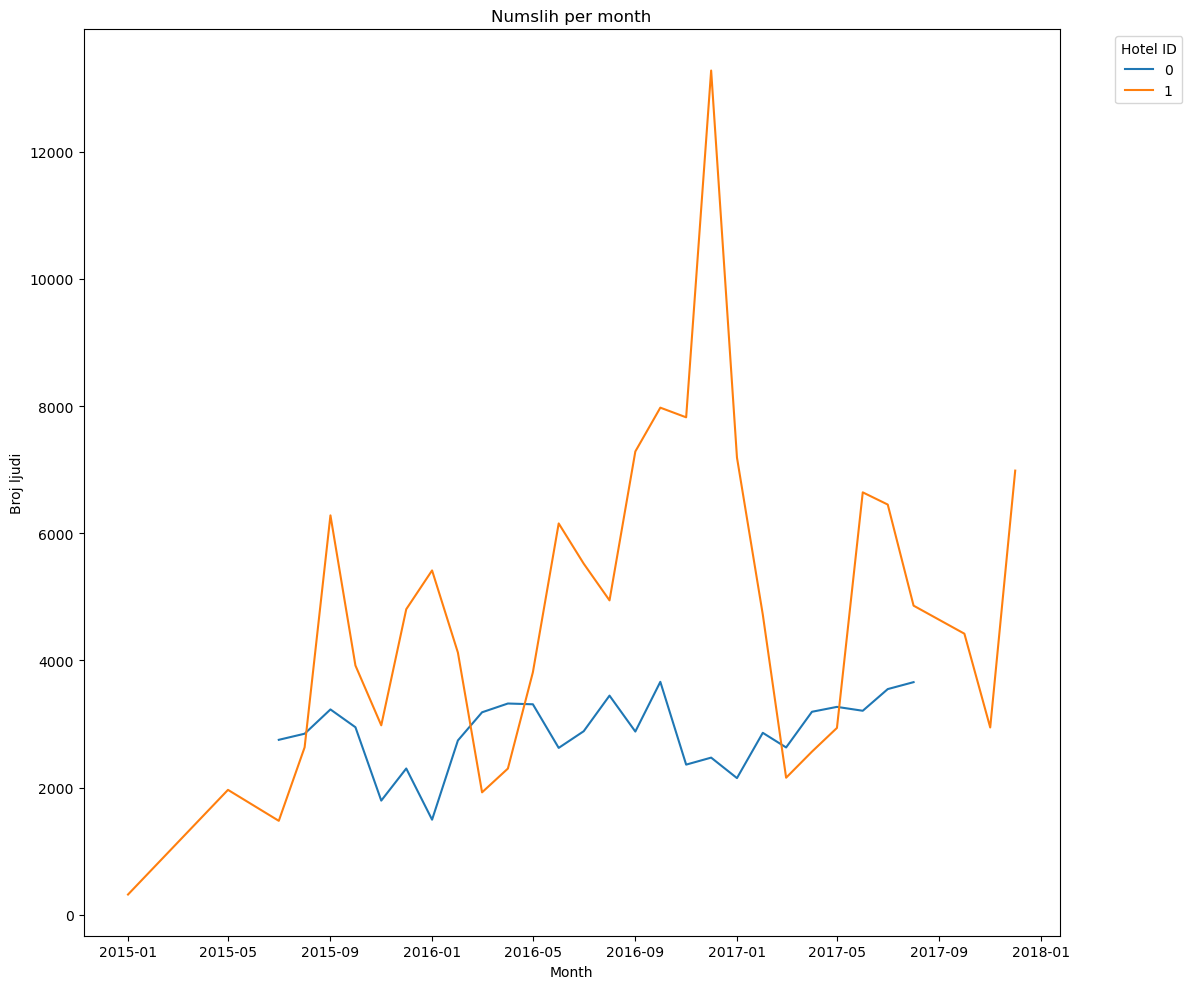

In [16]:
import matplotlib.pyplot as plt


df = pd.read_parquet(dataset_path)
df.head(10)

proba=pd.to_datetime(df['datum_dolaska'])
# print(proba)


monthly_data=df.groupby([proba.dt.to_period("M"),"hotel_id"]).agg({'broj_odraslih_gostiju':'sum'}).reset_index()
#print(monthly_data)

plt.figure(figsize=(12,10))
for hotel_id,data in monthly_data.groupby("hotel_id"):
    data["datum_dolaska"]=pd.to_datetime(data["datum_dolaska"].astype(str))
    plt.plot(data["datum_dolaska"].values,data["broj_odraslih_gostiju"].values,label=hotel_id)

#plt.plot(monthly_data['datum_dolaska'].dt.strftime('%Y-%m'), monthly_data['broj_odraslih_gostiju'], marker='o', linestyle='-', color='b')
#plt.plot(monthly_data_djeca['datum_dolaska'].dt.strftime('%Y-%m'), monthly_data_djeca['broj_djece_gostiju'], marker='o', linestyle='-', color='r')

plt.title('Numslih per month')
plt.xlabel('Month')
plt.ylabel('Broj ljudi')
plt.legend(title="Hotel ID",bbox_to_anchor=(1.05,1),loc="upper left")
plt.tight_layout()
plt.show

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       119210 non-null  int32         
 1   datum_dolaska                  119210 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    119210 non-null  datetime64[ns]
 3   datum_odjave                   119210 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  44199 non-null   object        
 5   broj_odraslih_gostiju          119210 non-null  int64         
 6   broj_djece_gostiju             119210 non-null  float64       
 7   zemlja_gosta                   119210 non-null  object        
 8   kanal_prodaje_id               119210 non-null  int32         
 9   tip_sobe_id                    119210 non-null  int32         
 10  cijena_nocenja                 119210 non-null  float64       
 11  

In [18]:
df.describe()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id
count,119210.000000,119210,119210,119210,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,1.192100e+05,1.192100e+05
mean,0.664063,2016-09-18 04:45:19.825518080,2016-06-06 09:30:00.513379584,2016-09-21 14:59:07.635265792,1.859206,0.112004,1.702357,1.503179,123.182994,1.372828e+06,1.053647e+06
min,0.000000,2015-01-01 00:00:00,2013-06-25 00:00:00,2015-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,40.003037,1.313223e+06,1.000000e+06
25%,0.000000,2016-02-29 00:00:00,2015-11-30 00:00:00,2016-03-03 00:00:00,2.000000,0.000000,2.000000,1.000000,80.917473,1.343025e+06,1.026866e+06
50%,1.000000,2016-10-08 00:00:00,2016-06-24 00:00:00,2016-10-11 00:00:00,2.000000,0.000000,2.000000,1.000000,109.455175,1.372828e+06,1.053626e+06
75%,1.000000,2017-03-15 00:00:00,2016-12-27 00:00:00,2017-03-19 00:00:00,2.000000,0.000000,2.000000,2.000000,146.425535,1.402630e+06,1.080427e+06
max,1.000000,2017-12-31 00:00:00,2017-12-31 00:00:00,2018-01-14 00:00:00,55.000000,10.000000,4.000000,8.000000,7351.295691,1.432432e+06,1.107288e+06
std,0.472319,NaN,NaN,NaN,0.575186,0.412849,0.681164,1.125512,65.494762,3.441311e+04,3.095049e+04


In [31]:
provjera_datumi=df
provjera_datumi.head(12)

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703
5,0,2015-07-01,2015-04-21,2015-07-03,NaT,2,0.0,GBR,2,1,143.304560,Check-Out,1313228,1044263
6,0,2015-07-01,2015-06-25,2015-07-03,NaT,2,0.0,PRT,0,0,161.502814,Check-Out,1313229,1022260
7,0,2015-07-01,2014-09-15,2015-07-03,NaT,2,0.0,PRT,0,0,151.176542,Check-Out,1313230,1101557
8,0,2015-07-01,2015-06-30,2015-07-04,2015-05-06,2,0.0,PRT,2,1,61.437192,Canceled,1313231,1075633
9,0,2015-07-01,2015-06-28,2015-07-04,2015-04-22,2,0.0,PRT,2,2,150.365262,Canceled,1313232,1056139
